In [5]:
# from collections import defaultdict

# client = storage.Client()

# bucket_name = 'marketplace-p115jwl6'
# bucket = client.get_bucket(bucket_name)

# folders = defaultdict(list)

# blobs = bucket.list_blobs()
# for blob in blobs:
#     folder = blob.name.split('/')[0]  
#     folders[folder].append(blob.name)

# for folder, files in folders.items():
#     print(f"Folder: {folder}")
#     for file in files[:5]:  
#         print(f"  {file}")
#     print("-" * 30)  

Folder: MICCAI FLARE22
  MICCAI FLARE22/114/artifactFiles/
  MICCAI FLARE22/114/artifactFiles/FLARE22Train/images/FLARE22_Tr_0001_0000.nii.gz
  MICCAI FLARE22/114/artifactFiles/FLARE22Train/images/FLARE22_Tr_0002_0000.nii.gz
  MICCAI FLARE22/114/artifactFiles/FLARE22Train/images/FLARE22_Tr_0003_0000.nii.gz
  MICCAI FLARE22/114/artifactFiles/FLARE22Train/images/FLARE22_Tr_0004_0000.nii.gz
------------------------------
Folder: MedMNIST
  MedMNIST/120/artifactFiles/
  MedMNIST/120/artifactFiles/adrenalmnist3d.npz
  MedMNIST/120/artifactFiles/adrenalmnist3d_64.npz
  MedMNIST/120/artifactFiles/bloodmnist.npz
  MedMNIST/120/artifactFiles/bloodmnist_128.npz
------------------------------
Folder: Medical Decathlon Heart
  Medical Decathlon Heart/146/artifactFiles/
  Medical Decathlon Heart/146/artifactFiles/dataset.json
  Medical Decathlon Heart/146/artifactFiles/imagesTr/la_003.nii.gz
  Medical Decathlon Heart/146/artifactFiles/imagesTr/la_004.nii.gz
  Medical Decathlon Heart/146/artifactFil

NIH Chest X-ray/105/artifactFiles/images/00000583_003.png
NIH Chest X-ray/105/artifactFiles/images/00000583_008.png
NIH Chest X-ray/105/artifactFiles/images/00000583_009.png
NIH Chest X-ray/105/artifactFiles/images/00000583_010.png
NIH Chest X-ray/105/artifactFiles/images/00000583_031.png
NIH Chest X-ray/105/artifactFiles/images/00000583_033.png
NIH Chest X-ray/105/artifactFiles/images/00000583_035.png
NIH Chest X-ray/105/artifactFiles/images/00000583_043.png
NIH Chest X-ray/105/artifactFiles/images/00000583_049.png
NIH Chest X-ray/105/artifactFiles/images/00000583_051.png


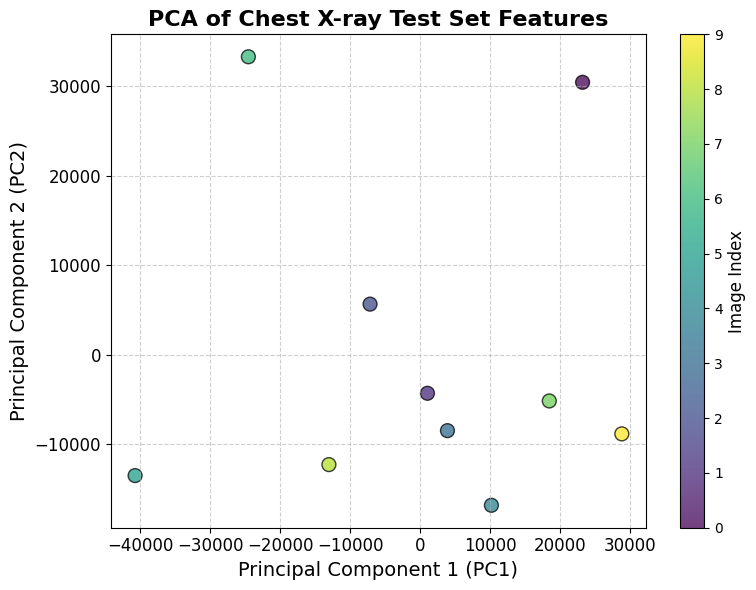

Total time taken: 8.097736358642578 seconds


In [38]:
import cv2
import numpy as np
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

start_time = time.time()

image_ids = test_df['id'].tolist()

image_base_path = 'NIH Chest X-ray/105/artifactFiles/images/'

def load_image_from_bucket(image_id):
    image_path = f"{image_base_path}{image_id}"
    print(image_path)
    blob = bucket.blob(image_path)
    image_data = blob.download_as_bytes()
    image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_GRAYSCALE)
    return image

images = []
for image_id in image_ids[:10]:
    image = load_image_from_bucket(image_id)
    images.append(image.flatten())

X = np.array(images)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

end_time = time.time()

plt.figure(figsize=(8, 6))  
# Create scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(len(X_pca)), cmap='viridis', s=100, edgecolor='k', alpha=0.75)

cbar = plt.colorbar(scatter)
cbar.set_label('Image Index', fontsize=12)

plt.title('PCA of Chest X-ray Test Set Features', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

print(f"Total time taken: {end_time - start_time} seconds")
